In [2]:
#import requaired library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the train dataset
train=pd.read_excel("train_housing.xlsx")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
#load the test dataset
test=pd.read_excel("test_housing.xlsx")

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [8]:
train.shape

(1168, 81)

In [9]:
test.shape

(292, 80)

In [7]:
train_data=train.append(test,sort=False)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [10]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
#check the null values
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

<AxesSubplot:>

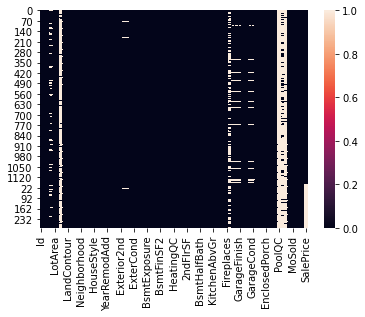

In [12]:
#we can easly understand the null valueas that are present our dataset by heatmap"whitw line"show null values
sns.heatmap(train_data.isnull())

In [13]:
#check the information of the data set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

# statistical summary of the dataset its show the mean std mini max 

In [14]:

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

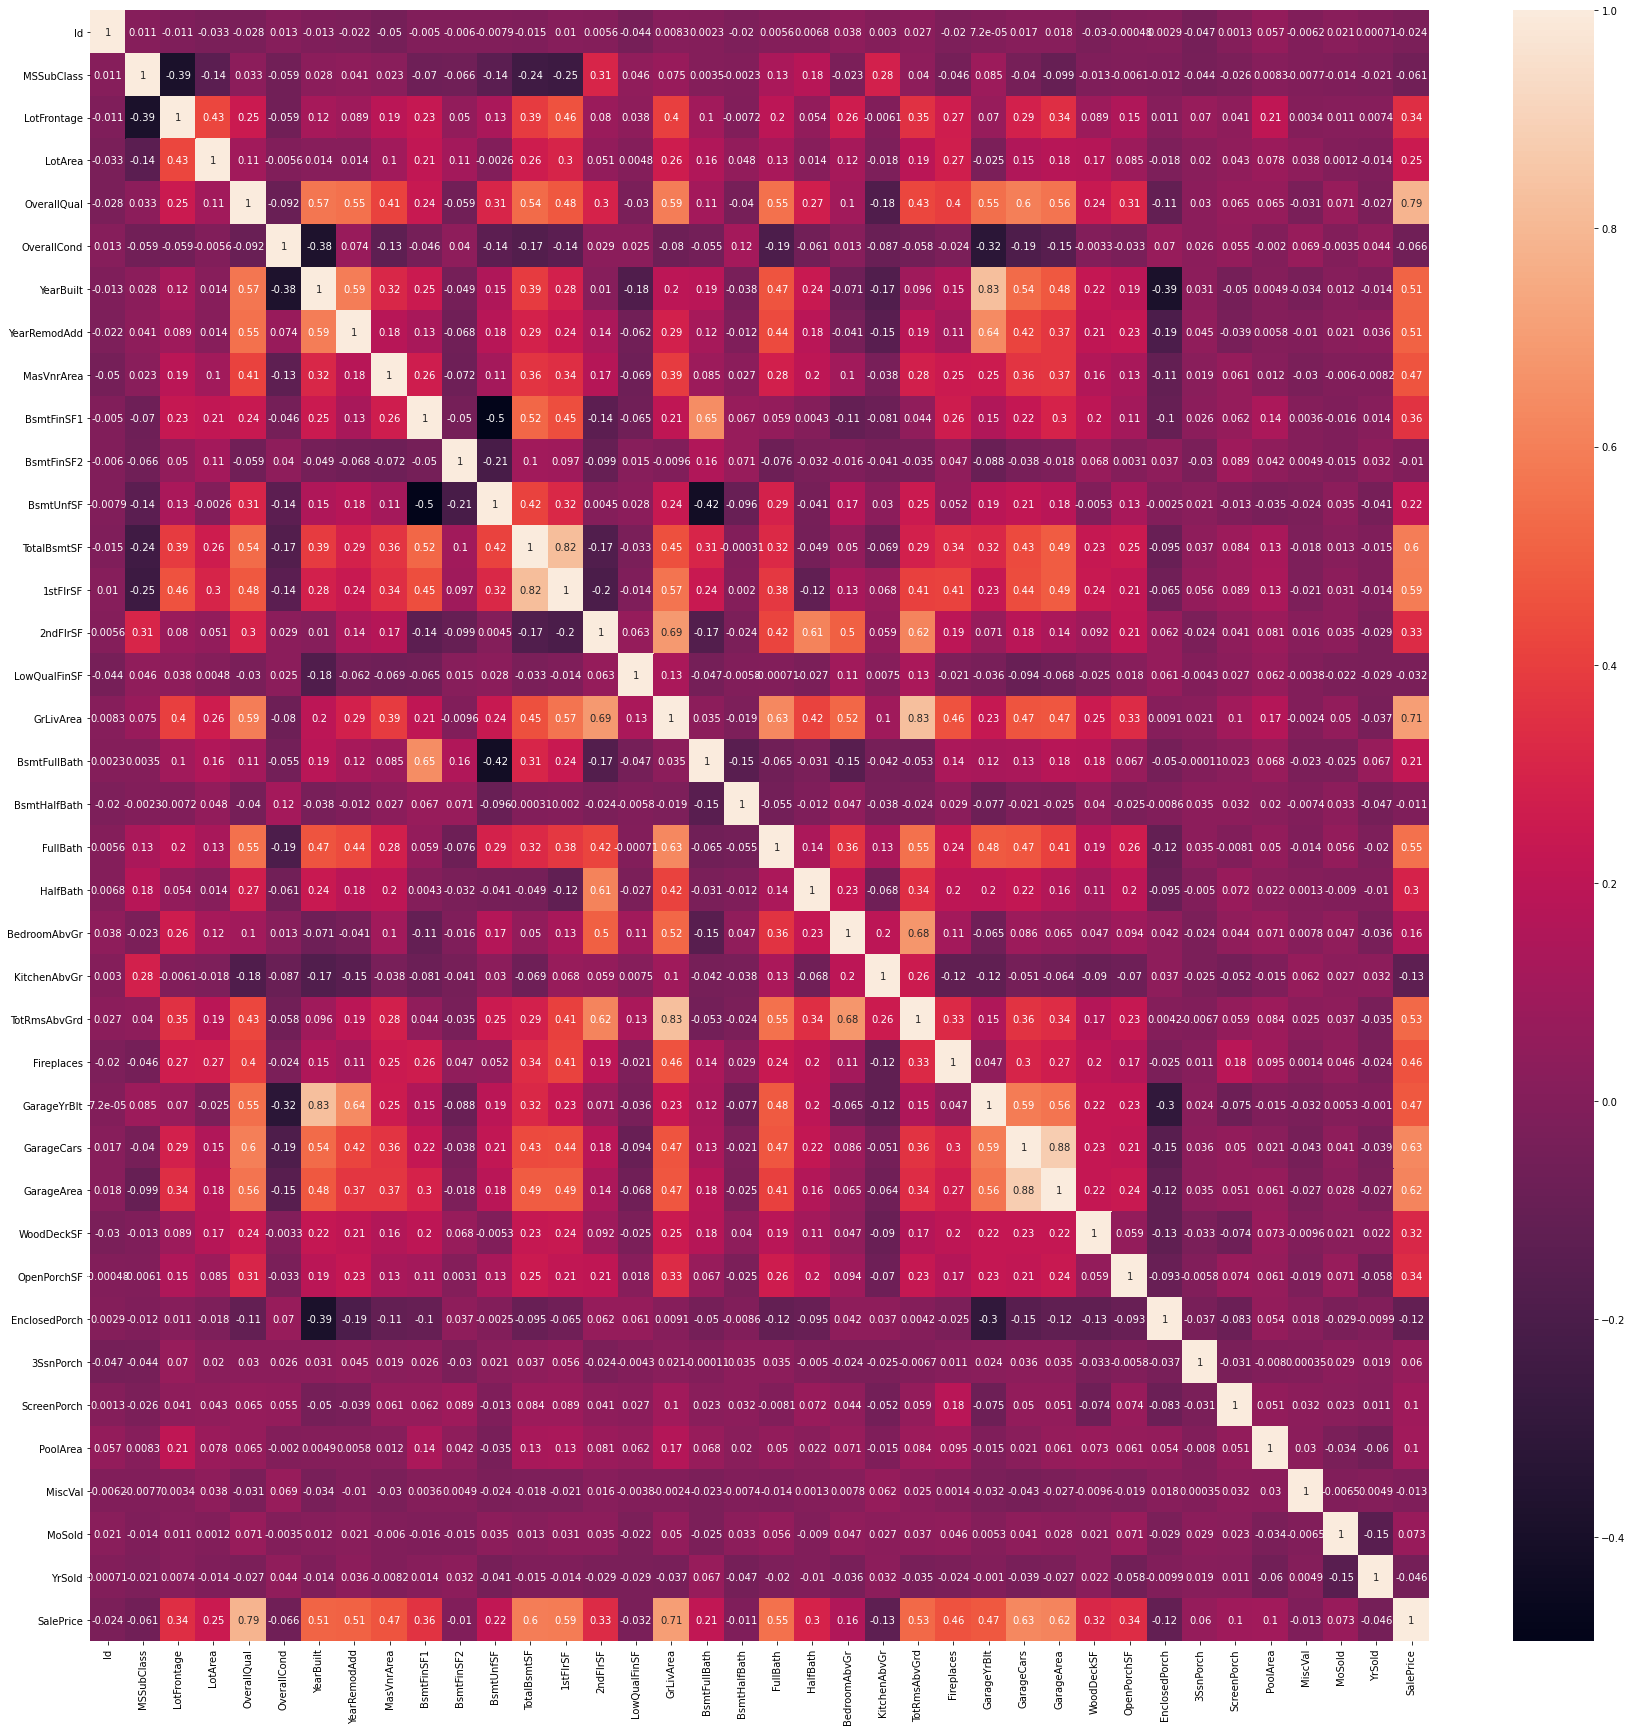

In [15]:
#check the correlation 
plt.figure(figsize=(30, 30))
sns.heatmap(train_data.corr(),annot=True)

in the heatmap lighter colur show the strong relation and dark color show the negative relation 

In [16]:
#some describtion about our target variable

In [17]:
train_data['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'saleprice distribution')

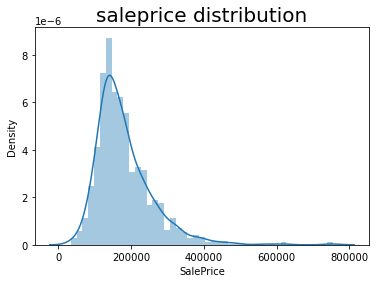

In [18]:
sns.distplot(train_data['SalePrice'])
plt.title("saleprice distribution",fontsize=20)

in our target variable skewness present (right skew)

In [19]:
train_data["SalePrice"].skew()

1.953877705368286

In [20]:
train_data["SalePrice"] = np.log(train_data["SalePrice"])

The log transformation is the most popular among the different types of transformations 
used to transform skewed data to approximately conform to normality.
If the original data follows a log-normal distribution or approximately so,
then the log-transformed data follows a normal or near normal distribution.


Text(0.5, 1.0, 'saleprice distribution after log distri')

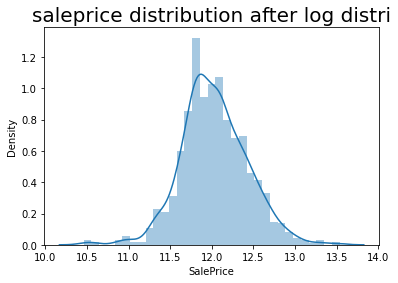

In [21]:
sns.distplot(train_data["SalePrice"])
plt.title("saleprice distribution after log distri",fontsize=20)

In [22]:
train_data["SalePrice"].skew()

0.07359740998337984

As you saw, log transformation of the target variable has helped us fixing its skewed distribution 
and the new distribution looks closer to normal

# check the missing values

In [23]:
missing_data = train_data.isnull().sum().sort_values(ascending = False)
missing_data

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
HeatingQC         0
Length: 81, dtype: int64

In [24]:
#check missing values columnswise
col_of_miss=train_data.columns[train_data.isnull().any()]
col_of_miss

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

In [25]:
#check the lenth of missing values
len(col_of_miss)

20

Out of 81 features, 20 features have missing values. Let's check the percentage of missing values in these columns

In [26]:
#missing value counts in each of these columns
miss = train_data.isnull().sum()/len(train_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
SalePrice       0.200000
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence.
Let's explaining these missing values using a bar plot.

In [27]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

In [28]:
miss

,count,Name
Name,,
Electrical,0.000685,Electrical
MasVnrType,0.005479,MasVnrType
MasVnrArea,0.005479,MasVnrArea
BsmtQual,0.025342,BsmtQual
BsmtCond,0.025342,BsmtCond
BsmtFinType1,0.025342,BsmtFinType1
BsmtExposure,0.026027,BsmtExposure
BsmtFinType2,0.026027,BsmtFinType2
GarageCond,0.055479,GarageCond


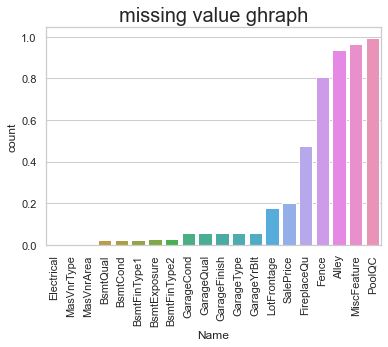

In [29]:
#plot the missing value count

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.title("missing value ghraph",fontsize=20)
plt.show()

# separete the columns in numeric and catagorical

In [30]:
#separate variables into new data frames
numeric_data = train_data.select_dtypes(include=[np.number])
cat_data = train_data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


In [31]:
del numeric_data['Id']

<AxesSubplot:>

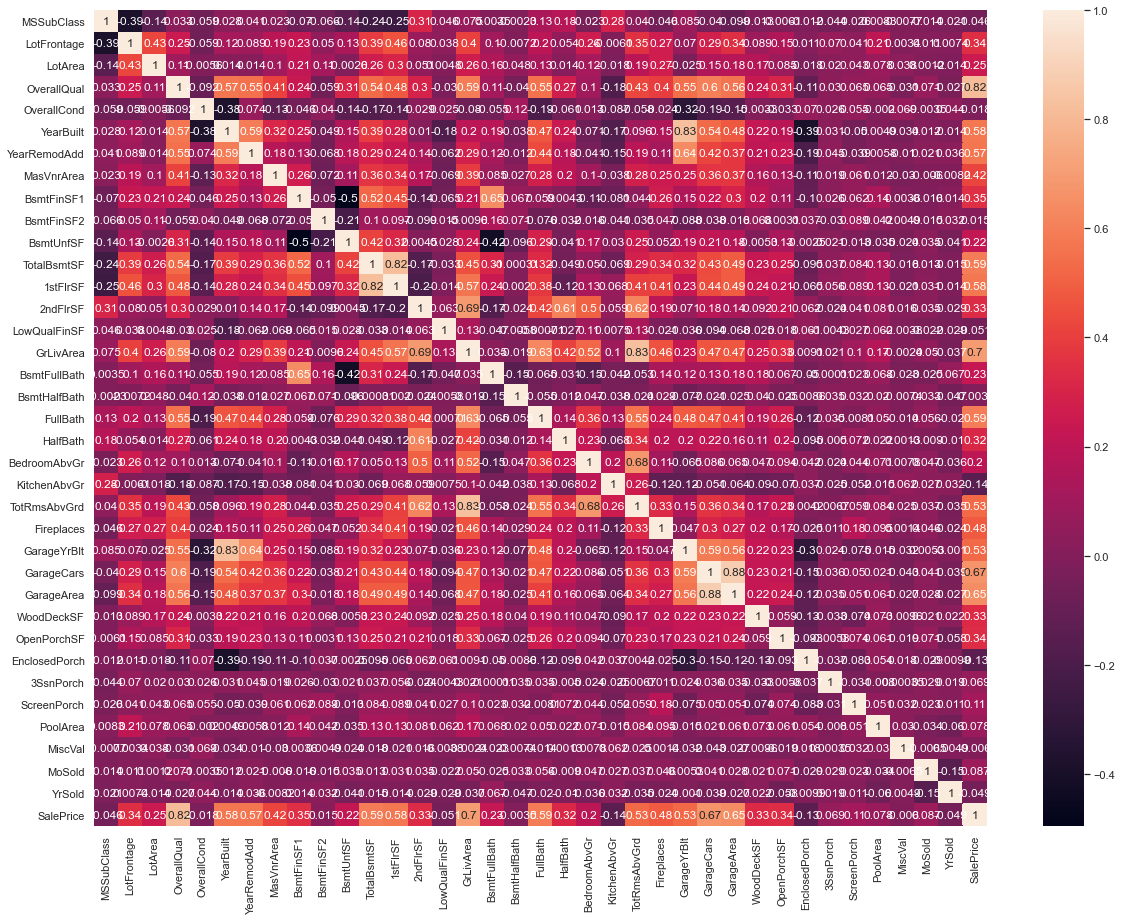

In [32]:
#correlation plot
corr = numeric_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

 We can see the correlation of all variables against SalePrice. As we can see, 
some variables seem to be strongly correlated with the target variable.
Here, a numeric correlation score will help us understand the graph better

In [34]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values positive correlation
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`negative correlation


SalePrice       1.000000
OverallQual     0.818551
GrLivArea       0.697364
GarageCars      0.671597
GarageArea      0.647206
FullBath        0.593204
TotalBsmtSF     0.592753
1stFlrSF        0.577722
YearBuilt       0.575768
YearRemodAdd    0.570256
TotRmsAbvGrd    0.531997
GarageYrBlt     0.528149
Fireplaces      0.481744
MasVnrArea      0.419153
BsmtFinSF1      0.348917
Name: SalePrice, dtype: float64 

----------------------
MSSubClass      -0.045982
YrSold          -0.048638
LowQualFinSF    -0.050755
EnclosedPorch   -0.133181
KitchenAbvGr    -0.141049
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'overallquality and saleprice')

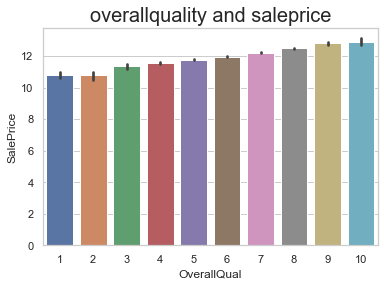

In [35]:
sns.barplot(x="OverallQual",y="SalePrice",data=train_data)
plt.title("overallquality and saleprice",fontsize=20)

As the overall quality of a house increases, its sale price also increases. 

Text(0.5, 1.0, ' grade (ground) living area square feet')

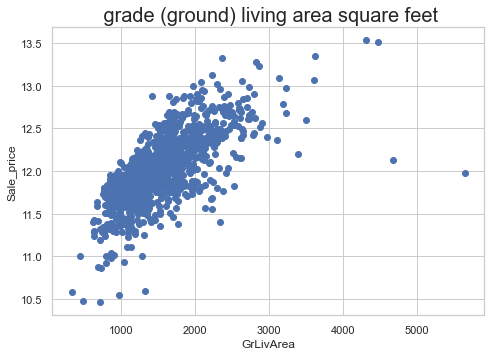

In [36]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x='GrLivArea',y="SalePrice",data=train_data)

ax.set_xlabel('GrLivArea')
ax.set_ylabel('Sale_price')
ax.set_title(' grade (ground) living area square feet',fontsize=20)

we see that increases in living area correspond to increases in price

Text(0.5, 1.0, ' Garage area')

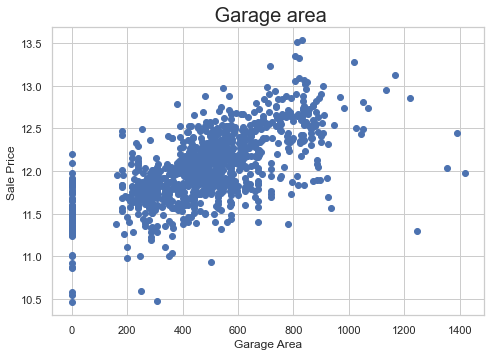

In [37]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(x='GarageArea', y="SalePrice",data=train_data)
ax.set_ylabel('Sale Price')
ax.set_xlabel('Garage Area')
ax.set_title(' Garage area',fontsize=20)


Notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage
There are a few outliers as well, we’ll remove those observations from our data.

In [38]:
train_data = train_data[train_data['GarageArea'] < 1200]


Text(0.5, 1.0, ' Garage area')

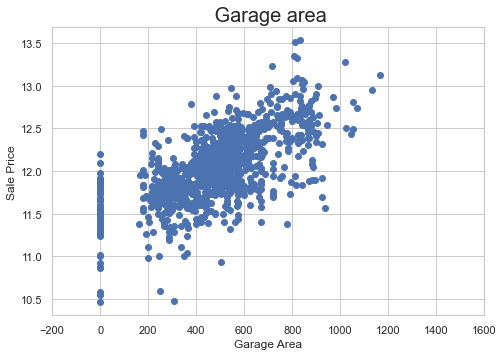

In [39]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(x='GarageArea', y="SalePrice",data=train_data)
plt.xlim(-200,1600)
ax.set_ylabel('Sale Price')
ax.set_xlabel('Garage Area')
ax.set_title(' Garage area',fontsize=20)

Text(0.5, 1.0, ' Garage cars')

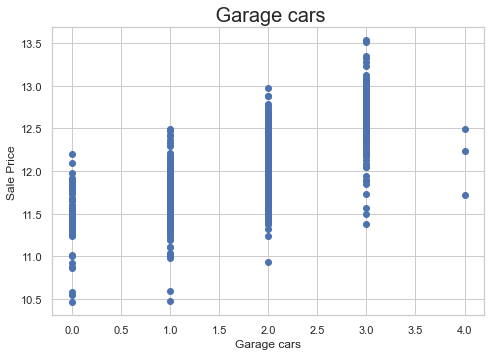

In [40]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(x='GarageCars', y="SalePrice",data=train_data)
ax.set_ylabel('Sale Price')
ax.set_xlabel('Garage cars')
ax.set_title(' Garage cars',fontsize=20)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

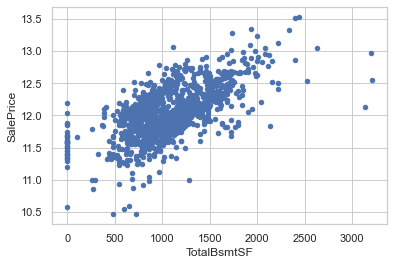

In [41]:
 data = pd.concat([train_data['SalePrice'],train_data['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')

TotalBsmtSF and SalePrice are also closely related

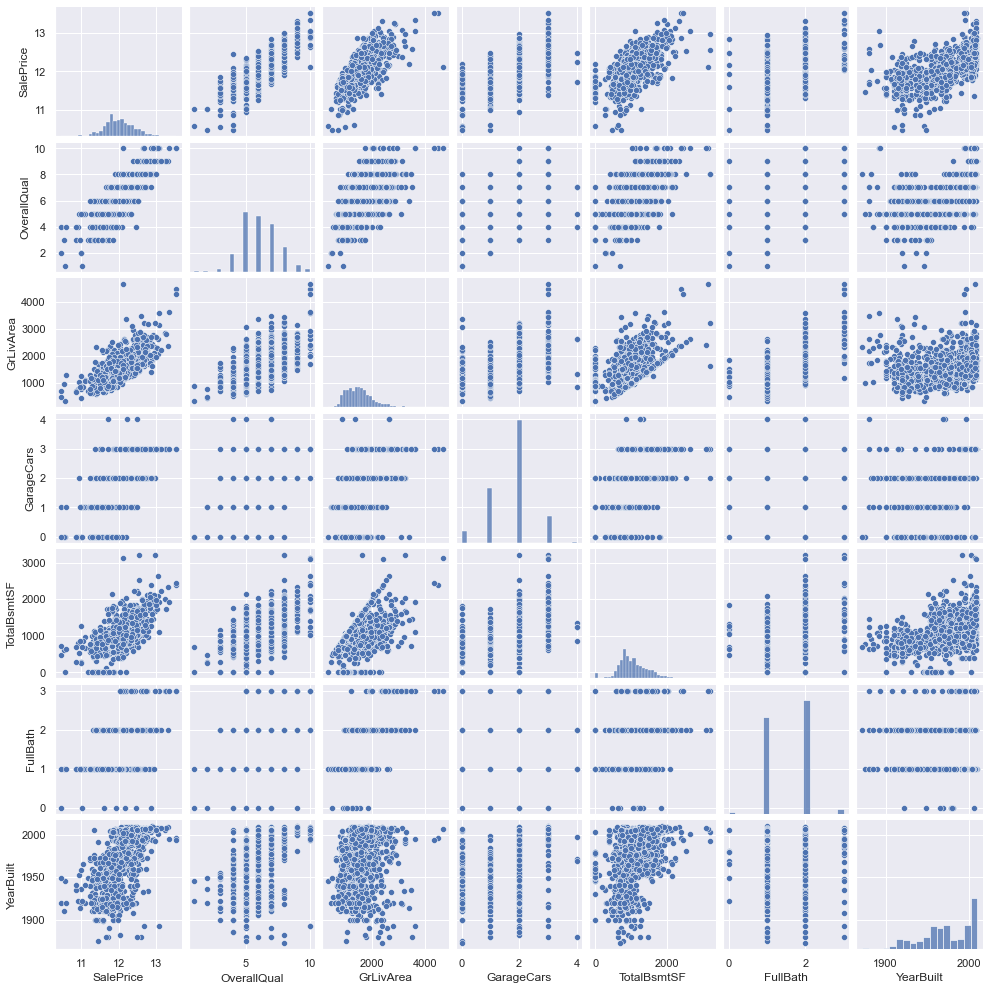

In [42]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train_data[cols], size = 2)
plt.show();

Although we already know some of the main features, 
this rich scatter plot gives us a reasonable idea about the relationship between variables

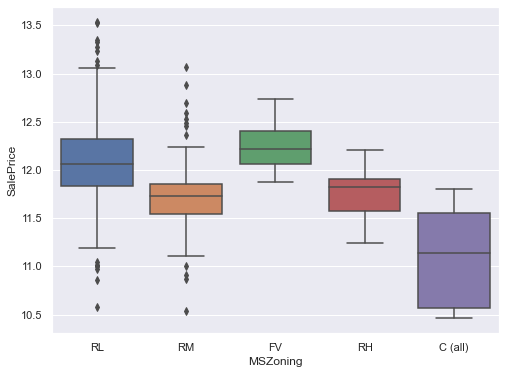

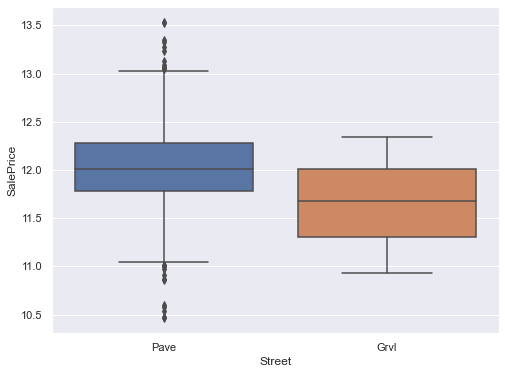

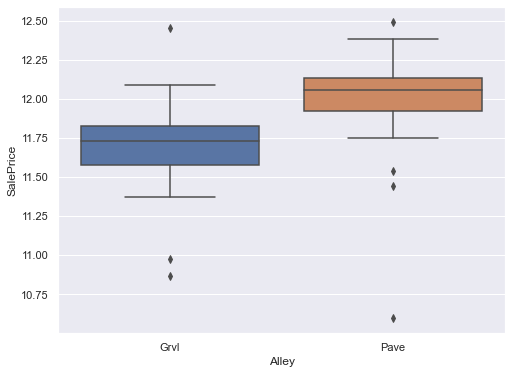

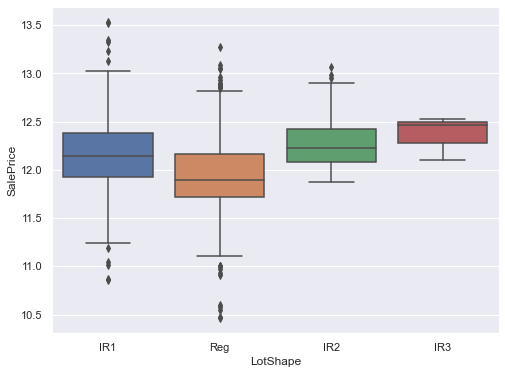

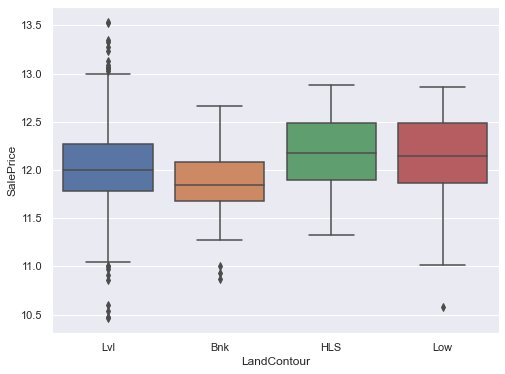

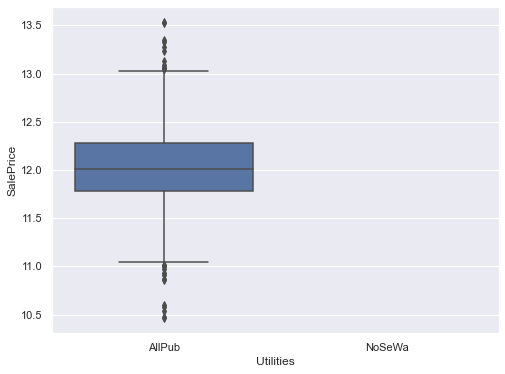

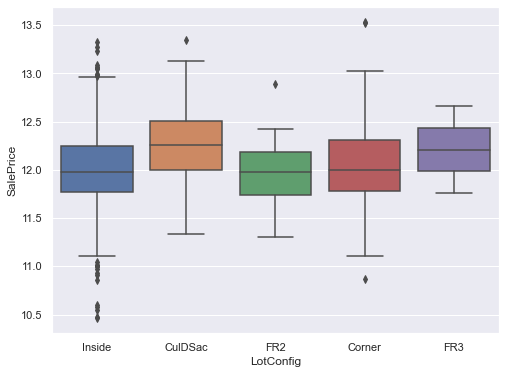

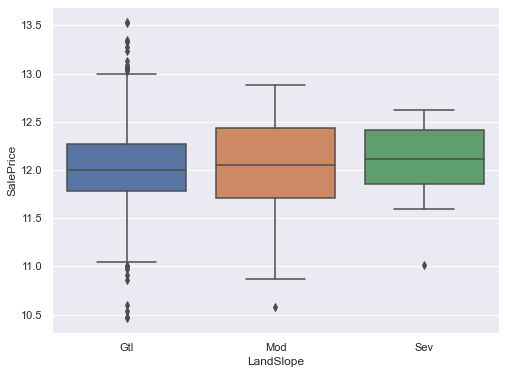

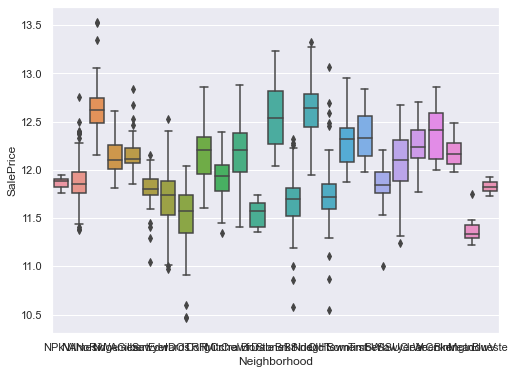

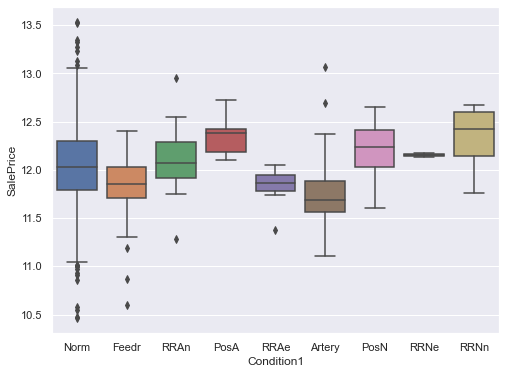

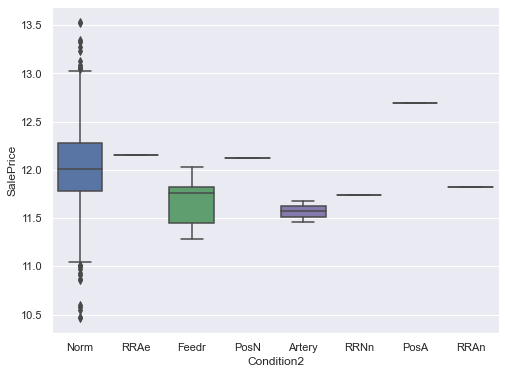

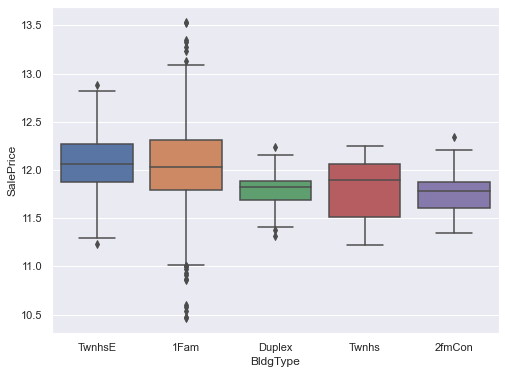

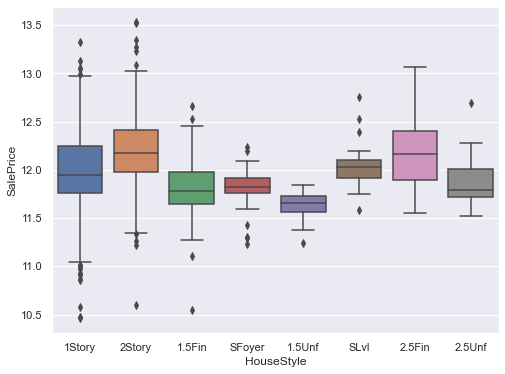

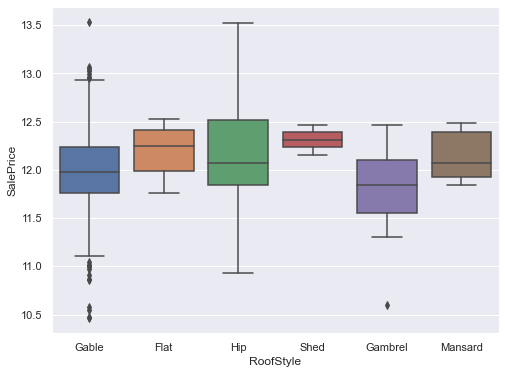

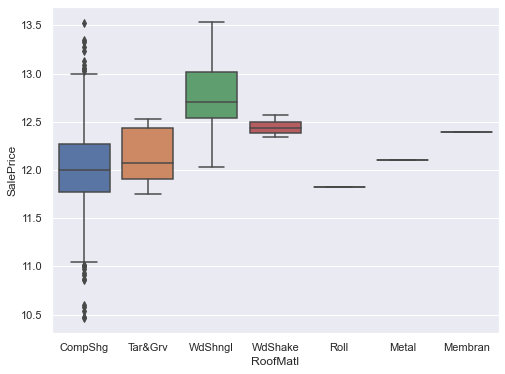

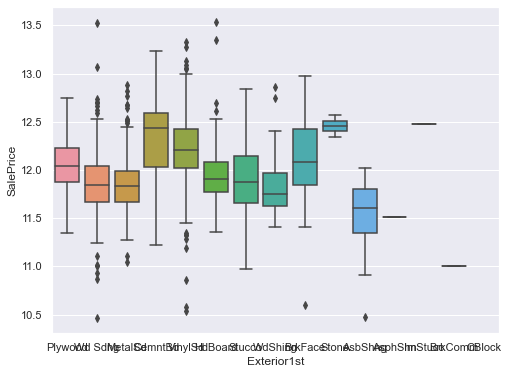

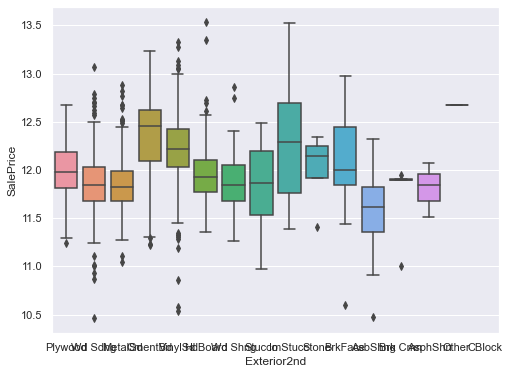

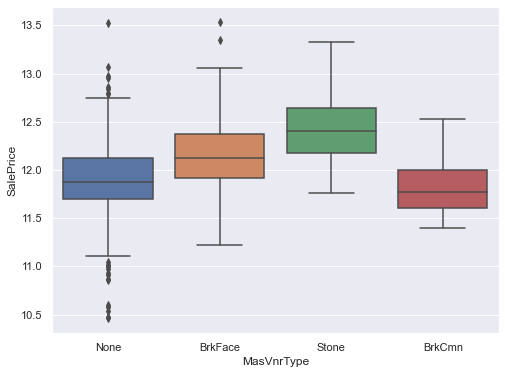

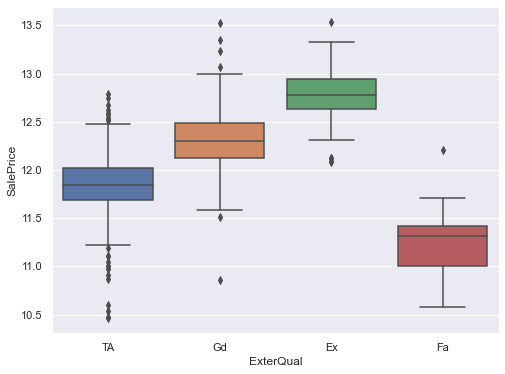

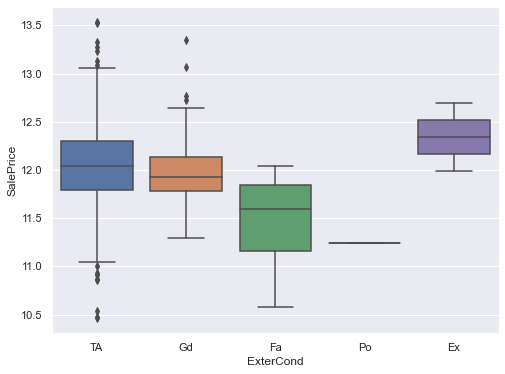

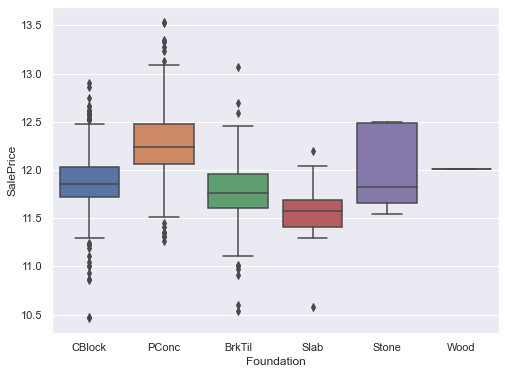

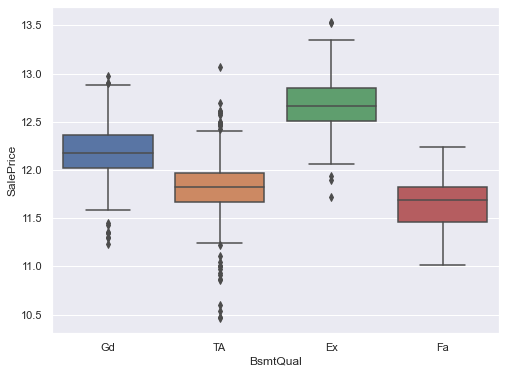

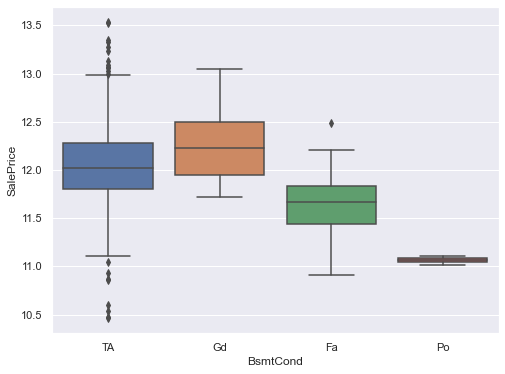

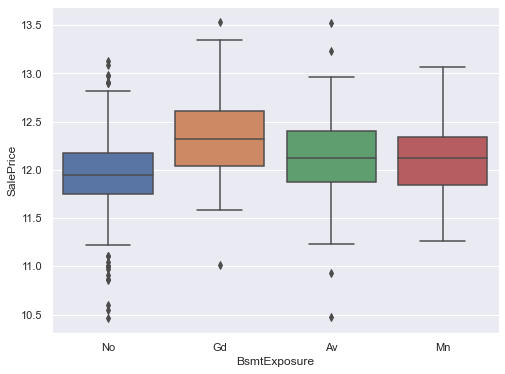

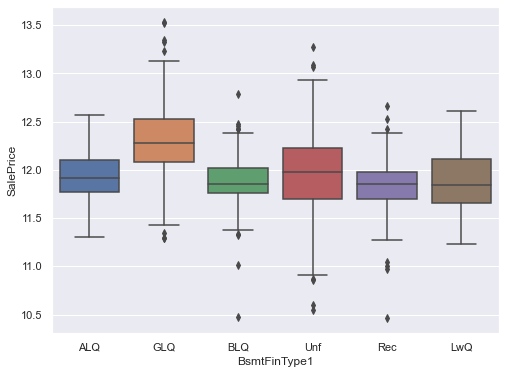

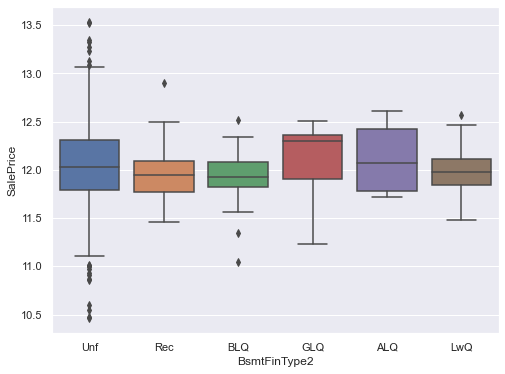

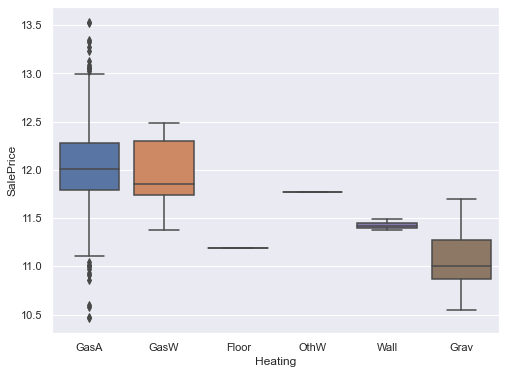

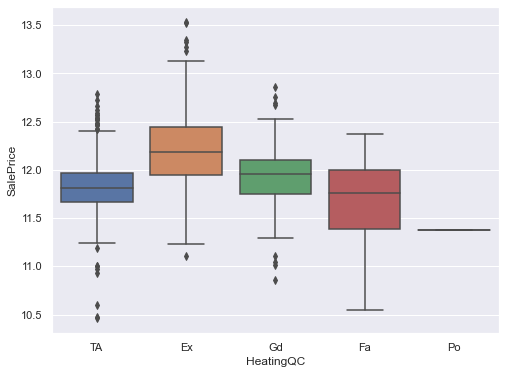

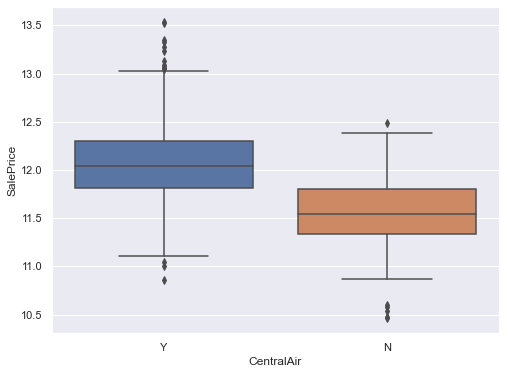

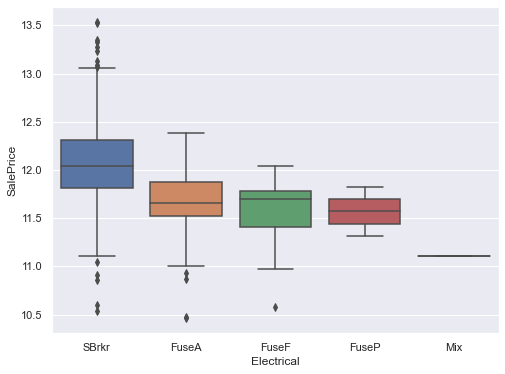

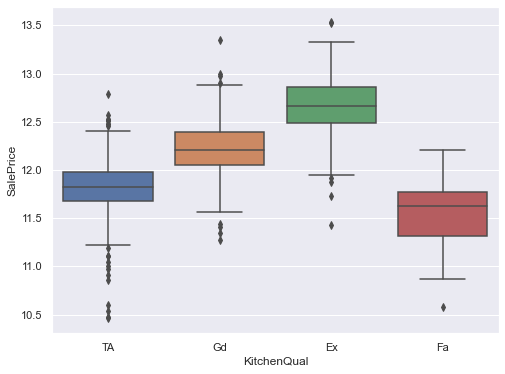

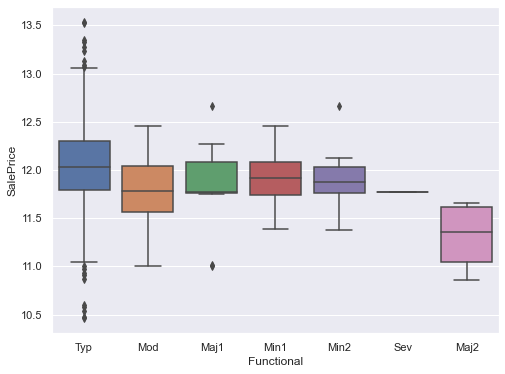

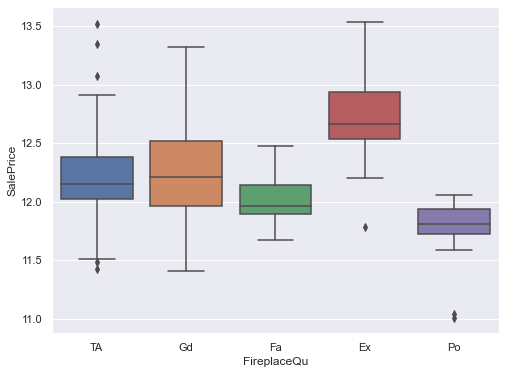

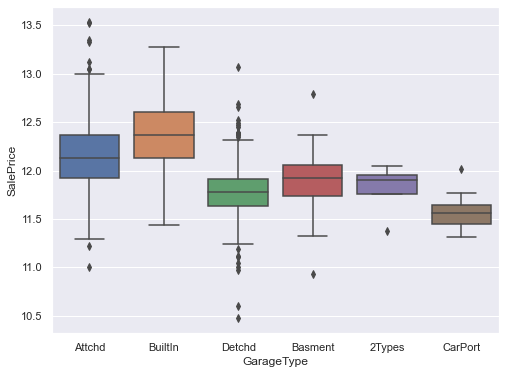

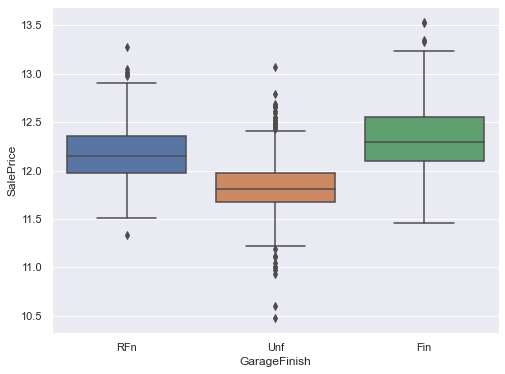

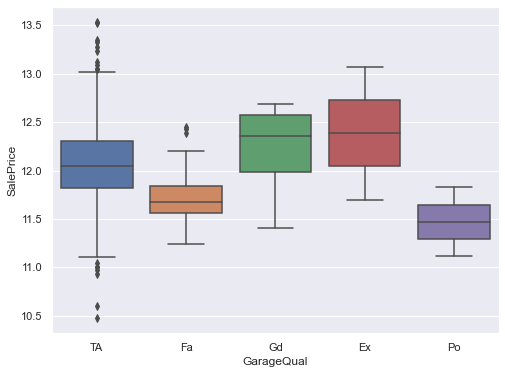

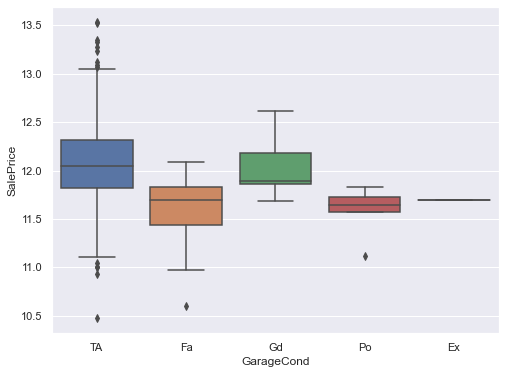

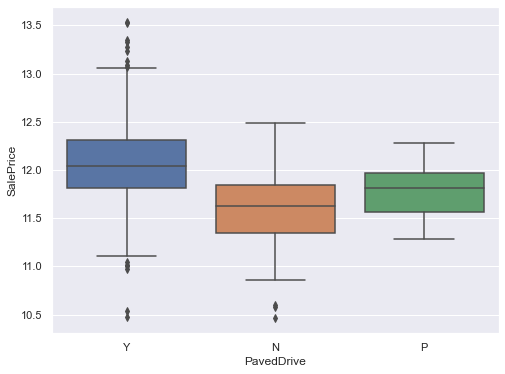

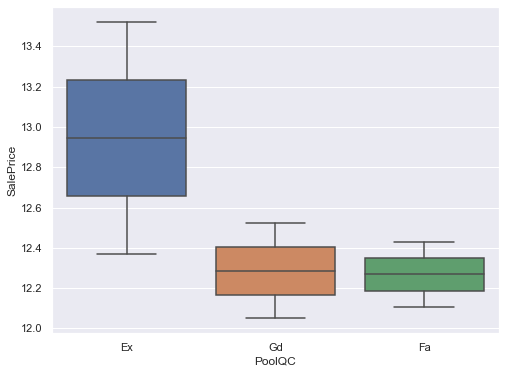

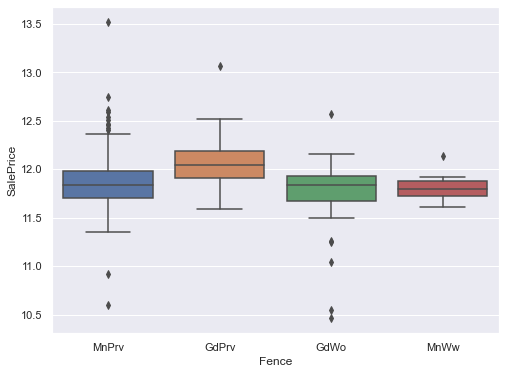

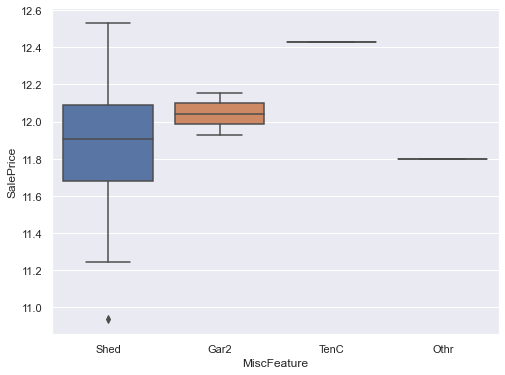

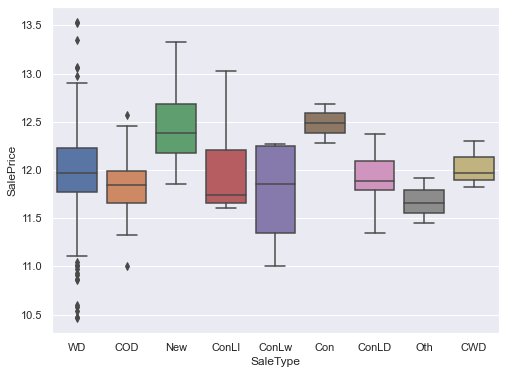

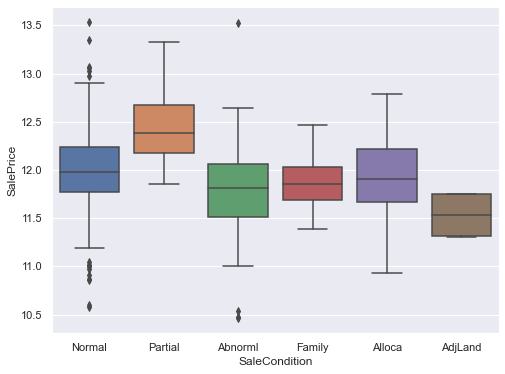

In [43]:
for i in cat_data:
    data = pd.concat([train_data['SalePrice'], train_data[i]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=i, y="SalePrice", data=train_data)
    #fig.axis(ymin=0, ymax=800000);

by the box plot we can understand the outliers in our data set aprox every categoricl columns have outliers

<AxesSubplot:>

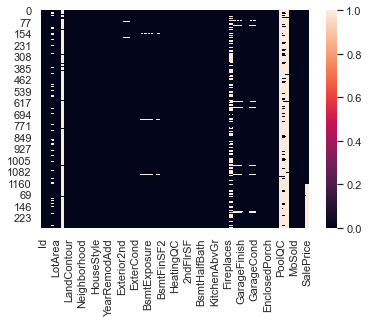

In [44]:
sns.heatmap(train_data.isnull())

In [45]:
train_data.skew()

Id                0.003505
MSSubClass        1.403747
LotFrontage       1.553293
LotArea          12.531409
OverallQual       0.206054
OverallCond       0.690472
YearBuilt        -0.614273
YearRemodAdd     -0.503395
MasVnrArea        2.688384
BsmtFinSF1        0.790861
BsmtFinSF2        4.246917
BsmtUnfSF         0.911046
TotalBsmtSF       0.570740
1stFlrSF          0.955202
2ndFlrSF          0.811213
LowQualFinSF      8.995367
GrLivArea         1.124294
BsmtFullBath      0.590046
BsmtHalfBath      4.095176
FullBath          0.037772
HalfBath          0.676769
BedroomAbvGr      0.210205
KitchenAbvGr      4.479607
TotRmsAbvGrd      0.666222
Fireplaces        0.633301
GarageYrBlt      -0.646596
GarageCars       -0.359031
GarageArea       -0.005242
WoodDeckSF        1.546366
OpenPorchSF       2.368137
EnclosedPorch     3.083098
3SsnPorch        10.286243
ScreenPorch       4.113996
PoolArea         15.932369
MiscVal          24.463620
MoSold            0.214965
YrSold            0.097323
S

# remove/replace the null values

In [46]:
for column in numeric_data.columns:
    train_data[column].fillna(train_data[column].mean(), inplace=True)

In [47]:
for column in cat_data.columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

<AxesSubplot:>

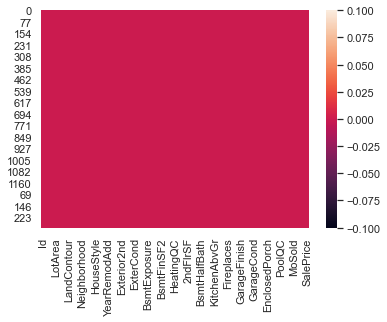

In [48]:
sns.heatmap(train_data.isnull())

In [49]:
train_data.isnull().sum().sort_values(ascending = False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [50]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,69.745196,4928,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2007,WD,Normal,11.759786
1,889,20,RL,95.000000,15865,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,10,2007,WD,Normal,12.498742
2,793,60,RL,92.000000,9920,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal,12.505399
3,110,20,RL,105.000000,11751,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,COD,Normal,12.154779
4,422,20,RL,69.745196,16635,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2009,WD,Normal,12.278393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.000000,10206,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,10,2008,WD,Normal,12.027881
288,1048,20,RL,57.000000,9245,Pave,Grvl,IR2,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,12.027881
289,17,20,RL,69.745196,11241,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,700,3,2010,WD,Normal,12.027881
290,523,50,RM,50.000000,5000,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,10,2006,WD,Normal,12.027881


In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=preprocessing.LabelEncoder()

In [52]:
#apply the encoding on catagorical columns
for i in cat_data:    
    train_data[i]=le.fit_transform(train_data[i].astype("str"))

In [53]:
train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,69.745196,4928,1,0,0,3,0,...,0,0,2,2,0,2,2007,8,4,11.759786
1,889,20,3,95.000000,15865,1,0,0,3,0,...,0,0,2,2,0,10,2007,8,4,12.498742


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   MSZoning       1455 non-null   int32  
 3   LotFrontage    1455 non-null   float64
 4   LotArea        1455 non-null   int64  
 5   Street         1455 non-null   int32  
 6   Alley          1455 non-null   int32  
 7   LotShape       1455 non-null   int32  
 8   LandContour    1455 non-null   int32  
 9   Utilities      1455 non-null   int32  
 10  LotConfig      1455 non-null   int32  
 11  LandSlope      1455 non-null   int32  
 12  Neighborhood   1455 non-null   int32  
 13  Condition1     1455 non-null   int32  
 14  Condition2     1455 non-null   int32  
 15  BldgType       1455 non-null   int32  
 16  HouseStyle     1455 non-null   int32  
 17  OverallQual    1455 non-null   int64  
 18  OverallCo

In [55]:
train_data.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.009048,-0.003466,-0.022195,-0.040779,0.018885,-0.001297,0.031244,-0.014692,1.339744e-02,...,0.048604,0.059264,-0.013476,0.005610,-0.006677,0.023830,0.001163,0.022046,-0.007034,-0.021119
MSSubClass,0.009048,1.000000,0.034269,-0.373393,-0.146399,-0.034976,0.185400,0.119469,-0.000479,-2.292189e-02,...,0.008153,0.011562,0.026276,-0.019808,-0.007173,-0.010328,-0.019501,0.009482,-0.024150,-0.039898
MSZoning,-0.003466,0.034269,1.000000,-0.103931,-0.032348,0.040302,-0.332506,0.064995,-0.021921,-1.291788e-03,...,-0.003141,-0.002453,-0.027344,-0.010651,0.012810,-0.029845,-0.020322,0.088841,0.010394,-0.142682
LotFrontage,-0.022195,-0.373393,-0.103931,1.000000,0.279895,-0.015649,-0.177772,-0.153620,-0.047551,-9.380876e-18,...,0.100649,0.012245,-0.040497,0.007428,-0.000012,0.025007,0.004631,-0.017779,0.049653,0.306717
LotArea,-0.040779,-0.146399,-0.032348,0.279895,1.000000,-0.209921,-0.077622,-0.169460,-0.135019,1.040715e-02,...,0.036480,0.019530,0.003700,-0.009690,0.038491,0.010042,-0.014268,0.017619,0.029530,0.204933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.023830,-0.010328,-0.029845,0.025007,0.010042,0.011428,-0.022071,-0.033438,-0.017611,-5.169853e-02,...,-0.018668,0.000139,-0.018770,-0.004015,-0.007117,1.000000,-0.146851,-0.047155,0.014584,0.078531
YrSold,0.001163,-0.019501,-0.020322,0.004631,-0.014268,-0.025836,-0.001312,0.036202,0.020437,2.337491e-02,...,-0.063997,-0.043026,-0.014960,-0.011452,0.004844,-0.146851,1.000000,-0.001141,0.003057,-0.044473
SaleType,0.022046,0.009482,0.088841,-0.017779,0.017619,-0.018249,-0.006103,0.001468,-0.030228,-1.273689e-01,...,0.019819,0.015477,-0.006498,-0.012292,0.017769,-0.047155,-0.001141,1.000000,0.187668,-0.036458
SaleCondition,-0.007034,-0.024150,0.010394,0.049653,0.029530,0.008945,-0.028202,-0.039601,0.036933,-8.975111e-02,...,-0.080326,-0.019650,0.047546,-0.008346,0.013114,0.014584,0.003057,0.187668,1.000000,0.234141


In [57]:
train_data["Utilities"].value_counts()

0    1454
1       1
Name: Utilities, dtype: int64

In [59]:
train_data["Utilities"].value_counts() #in this columns all value are null so we can drope this

0    1454
1       1
Name: Utilities, dtype: int64

In [60]:
train_data.drop("Utilities",1,inplace=True)

In [61]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,69.745196,4928,1,0,0,3,4,...,0,0,2,2,0,2,2007,8,4,11.759786
1,889,20,3,95.000000,15865,1,0,0,3,4,...,0,0,2,2,0,10,2007,8,4,12.498742
2,793,60,3,92.000000,9920,1,0,0,3,1,...,0,0,2,2,0,6,2007,8,4,12.505399
3,110,20,3,105.000000,11751,1,0,0,3,4,...,0,0,2,2,0,1,2010,0,4,12.154779
4,422,20,3,69.745196,16635,1,0,0,3,2,...,0,0,2,2,0,6,2009,8,4,12.278393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,3,78.000000,10206,1,0,3,3,4,...,0,0,2,2,0,10,2008,8,4,12.027881
288,1048,20,3,57.000000,9245,1,0,1,3,4,...,0,0,2,2,0,2,2008,8,4,12.027881
289,17,20,3,69.745196,11241,1,0,0,3,1,...,0,0,2,2,700,3,2010,8,4,12.027881
290,523,50,4,50.000000,5000,1,0,3,3,0,...,0,0,2,2,0,10,2006,8,4,12.027881


In [62]:
x=train_data.drop(['SalePrice'],axis=1)
y=train_data.SalePrice

In [63]:
x.skew()

Id                0.003505
MSSubClass        1.403747
MSZoning         -1.707308
LotFrontage       1.712148
LotArea          12.531409
                   ...    
MiscVal          24.463620
MoSold            0.214965
YrSold            0.097323
SaleType         -3.900303
SaleCondition    -2.742426
Length: 79, dtype: float64

In [64]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
print(scaler.fit(x))

MinMaxScaler()


In [65]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,69.745196,4928,1,0,0,3,4,...,0,0,2,2,0,2,2007,8,4,11.759786
1,889,20,3,95.000000,15865,1,0,0,3,4,...,0,0,2,2,0,10,2007,8,4,12.498742
2,793,60,3,92.000000,9920,1,0,0,3,1,...,0,0,2,2,0,6,2007,8,4,12.505399
3,110,20,3,105.000000,11751,1,0,0,3,4,...,0,0,2,2,0,1,2010,0,4,12.154779
4,422,20,3,69.745196,16635,1,0,0,3,2,...,0,0,2,2,0,6,2009,8,4,12.278393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,3,78.000000,10206,1,0,3,3,4,...,0,0,2,2,0,10,2008,8,4,12.027881
288,1048,20,3,57.000000,9245,1,0,1,3,4,...,0,0,2,2,0,2,2008,8,4,12.027881
289,17,20,3,69.745196,11241,1,0,0,3,1,...,0,0,2,2,700,3,2010,8,4,12.027881
290,523,50,4,50.000000,5000,1,0,3,3,0,...,0,0,2,2,0,10,2006,8,4,12.027881


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# RandomForestRegressor

In [107]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R squar score",metrics.r2_score(y_test, y_pred))

MAE: 0.14678871241410546
MSE: 0.045866070550552876
RMSE: 0.21416365366362444
R squar score 0.6593070906529052


Text(0, 0.5, 'Real value')

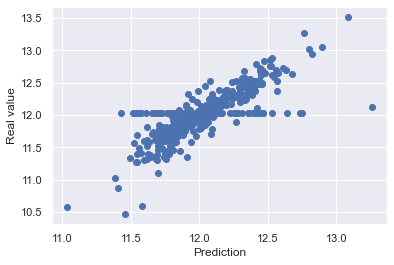

In [109]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# LinearRegression

In [110]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficients
print("Coefficients: \n", lr.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


MAE: 0.14646328395237426
MSE: 0.04577902028784824
RMSE: 0.21396032409736213
Coefficients: 
 [-1.67660960e-05  7.69734460e-06  8.42736929e-03  6.11169901e-04
  6.26322487e-07  6.63630999e-02  4.92045891e-02 -4.26049712e-03
  1.54335789e-03  2.98905369e-03 -8.83589753e-03 -1.45773447e-03
  9.72617181e-03 -4.99514940e-03 -6.16931785e-03  4.90773828e-03
  5.34014914e-02  3.79155343e-02  1.07947105e-03  6.80202392e-04
 -3.33462573e-03  1.39945370e-02 -6.79724794e-04  1.61400489e-03
  1.55837343e-02  4.70359286e-05 -2.90845348e-03  3.92569174e-03
  9.70043663e-03 -2.22310697e-02  2.19340771e-02  8.34567236e-03
 -5.04890108e-03  2.55676854e-05 -1.50846604e-03  2.74403115e-05
 -1.10193492e-05  4.19886479e-05 -2.23692554e-02 -8.04787630e-03
  6.96653054e-02 -1.43038162e-03  1.56410419e-04  1.02614420e-04
 -1.37286729e-04  1.21738110e-04  2.85790586e-02  1.69108651e-02
  2.84663692e-02  1.12771528e-02 -1.32198373e-02 -2.45594760e-02
 -8.10799488e-04 -9.56873537e-03  1.90355307e-02  2.15317054e-0

Text(0, 0.5, 'Real value')

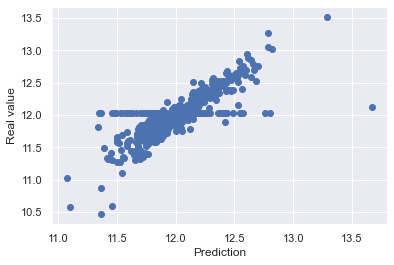

In [111]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# KNeighborsRegressor

In [112]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.1849246845793168
MSE: 0.06576809904637564
RMSE: 0.25645291779657264


Text(0, 0.5, 'Real value')

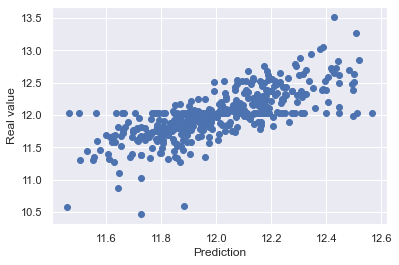

In [113]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# DecisionTreeRegressor

In [103]:
dt =DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.21270752019239034
MSE: 0.08945664896681883
RMSE: 0.29909304399604286


Text(0, 0.5, 'Real value')

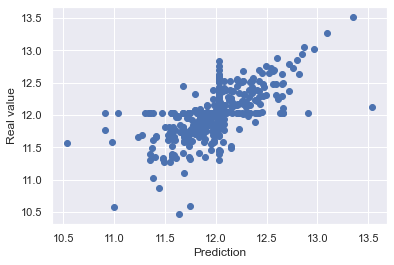

In [104]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [85]:
from sklearn import linear_model


# Lasso and Ridge

In [114]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("Rsqur score",r2_score(y_test, y_pred))

MAE 0.14919408647742297
MSE 0.049552141506423286
Rsqur score 0.6319269767050323


Text(0, 0.5, 'Real value')

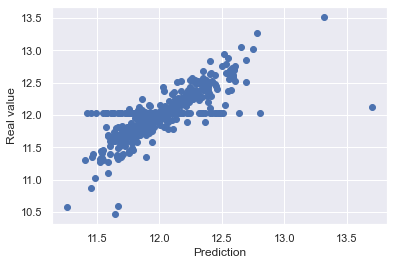

In [115]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

In [116]:
rdg = linear_model.Ridge(alpha=1)
rdg.fit(x_train, y_train)

y_pred = rdg.predict(x_test)

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("Rsqur score",r2_score(y_test, y_pred))

MAE 0.14623213827149995
MSE 0.04559747823695487
Rsqur score 0.6613021928199224


Text(0, 0.5, 'Real value')

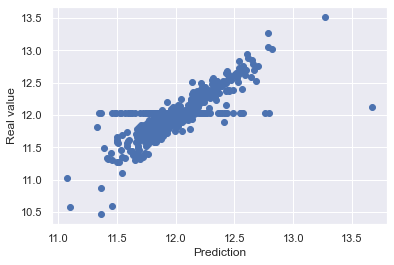

In [117]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')



In [119]:
rdg = linear_model.Ridge(alpha=100)
rdg.fit(x_train, y_train)

y_pred = rdg.predict(x_test)

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("Rsqur score",r2_score(y_test, y_pred))

MAE 0.14414987465472281
MSE 0.04481832168465905
Rsqur score 0.6670897632276802
